In [1]:
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Machine Learning 101

## Plan

* [Introduction](#Introduction)
* [Classification](#Classification---MNIT-dataset)
* [Regression](#Regression---Boston-housing-price-dataset)
* [Unsupervised learning : Clustering](#Unsupervised-Learning-:-Clustering---Iris-dataset)
* [Dimensionality reduction & model selection](#Dimensionality-reduction-&-model-selection---Eigenfaces)
* [Things I didn't talk about](#Things-I-didn't-talk-about)
* [Resources](#Resources)

## Introduction

* Programs that adapt their behavior to previously seen data
* Outcome is based on data quality, data quantity and model quality
* We will use different datasets from sklearn to show each application

## Classification - MNIT dataset

First we have to load the dataset.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print digits.data.shape

(1797, 64)


We can see that there is 1797 digits in the dataset. Each digit is an 8x8 arrays of floats from 0 to 1 representing each pixel's shade of grey.

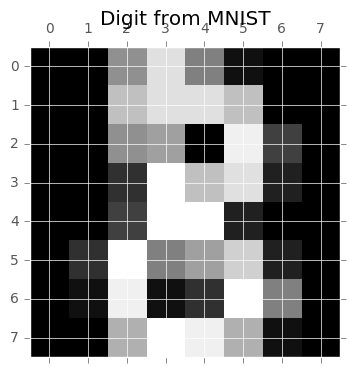

In [3]:
import pylab as pl
pl.matshow(digits.images[8], cmap=pl.cm.gray)
pl.title("Digit from MNIST")

We need to split the dataset into a test and a training datasets. This way we can test our model on different data than the data it was trained on. This is a mandatory step to avoid overfitting.

In [4]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(digits.data, digits.target, test_size=0.2)

Here we have the train/test data and labels in their own variable. We can now create, train and test a Machine Learning model. Let's use a Gaussian Naive Bayes model, train it and test our accuracy predicting the test labels.

In [5]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_data, train_labels)
score = gnb.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 87.22%


We hit 86% of accuracy with 80% of the dataset, let's see how the size of the training dataset affects the accuracy. We can try to fit our model with 10% of the training data and we see that the accuracy is reduced.

In [6]:
gnb.fit(train_data[:len(train_data)/10], train_labels[:len(train_labels)/10])
score = gnb.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 72.50%


Let's plot our accuracy based on the number of training data point.

In [7]:
plot_data = {}
for x in range(1, 100):
  gnb.fit(train_data[:len(train_data) * x/100], train_labels[:len(train_data) * x/100])
  score = gnb.score(test_data, test_labels)
  plot_data[x] = score

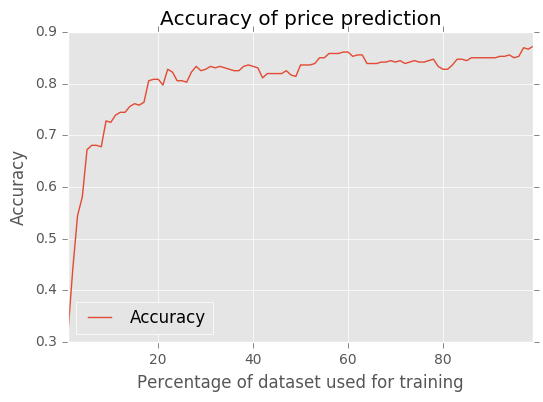

In [8]:
import pandas as pd
acc_by_training = pd.DataFrame.from_dict(plot_data, orient='index')
acc_by_training.columns = ['Accuracy']
ax = acc_by_training.plot(title="Accuracy of price prediction")
ax.set_xlabel('Percentage of dataset used for training')
ax.set_ylabel('Accuracy')

## Regression - Boston housing price dataset

In [9]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston["PRICE"] = boston_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The boston housing price dataset contains 13 features (crime rate, number of rooms, age, etc..) and the target is the price of the house.

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(boston.drop('PRICE', axis=1), boston.PRICE, test_size=0.2)

Let's use a simple model and compute its accuracy.

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(train_data, train_labels)
score = lm.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 69.98%


LinearRegression finds the best fiting line given a list of points. Let's draw it for room size in red, distance to work in green and lstat in blue.

In [12]:
def plot_regression(column, color='r'):
  lm = LinearRegression(normalize=True)
  lm.fit(train_data[[column]], train_labels)
  pl.scatter(test_data[[column]], test_labels, color=color, alpha=0.30)
  return pl.plot(test_data[[column]], lm.predict(test_data[[column]]), color=color, label=column)[0]

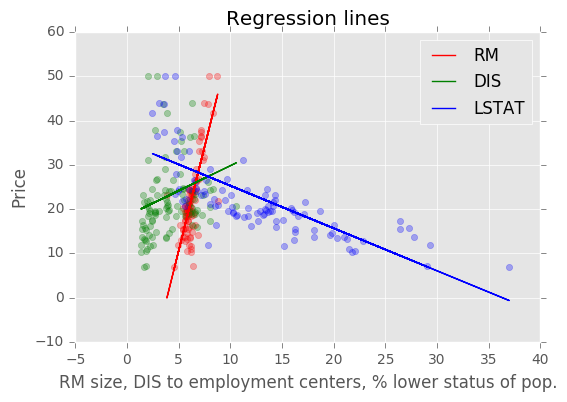

In [13]:
pl.legend(handles=[plot_regression('RM', 'r'), plot_regression('DIS', 'g'), plot_regression('LSTAT', 'b')])
pl.title('Regression lines')
pl.ylabel('Price')
pl.xlabel('RM size, DIS to employment centers, % lower status of pop.')

## Unsupervised Learning : Clustering - Iris dataset

In [14]:
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris["TYPE"] = iris_data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TYPE
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The iris dataset contains a list of three types of iris : setosa, versicolor and virginica. For each flower we have its sepal width, sepal length, petal width and petal length.

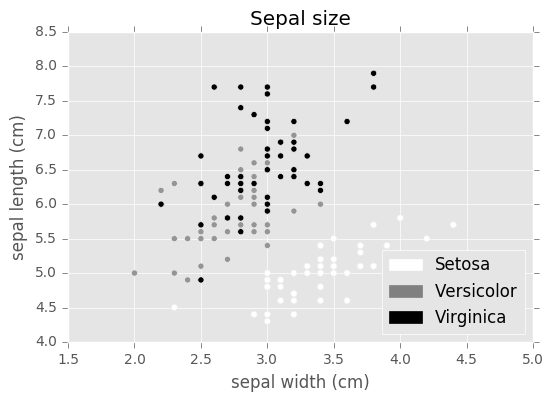

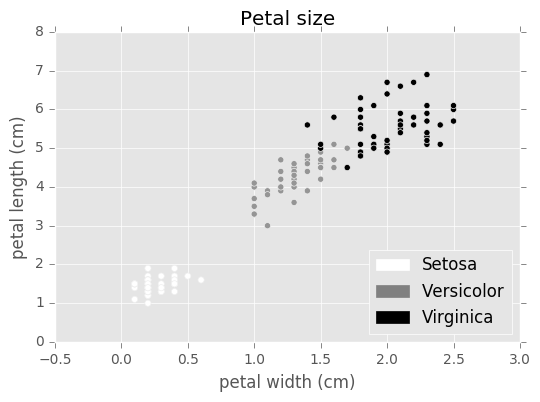

In [15]:
white_patch = mpatches.Patch(color='white', label='Setosa')
grey_patch = mpatches.Patch(color='grey', label='Versicolor')
black_patch = mpatches.Patch(color='black', label='Virginica')

ax = iris.plot(kind='scatter', x='sepal width (cm)', y='sepal length (cm)', c=iris_data.target, colorbar=False, title='Sepal size')
ax.legend(handles=[white_patch, grey_patch, black_patch], loc=4)
ax = iris.plot(kind='scatter', x='petal width (cm)', y='petal length (cm)', c=iris_data.target, colorbar=False, title='Petal size')
ax.legend(handles=[white_patch, grey_patch, black_patch], loc=4)

Imagine we lost the labels of our data but we still knew that we have three types of iris, we would need a way the categorize our data again.

In [16]:
from sklearn.cluster import KMeans
data = iris.drop('TYPE', axis=1)

kmeans = KMeans(n_clusters=3, random_state=0x2)
kmeans.fit(data)
predicted_labels = kmeans.predict(data)

print predicted_labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


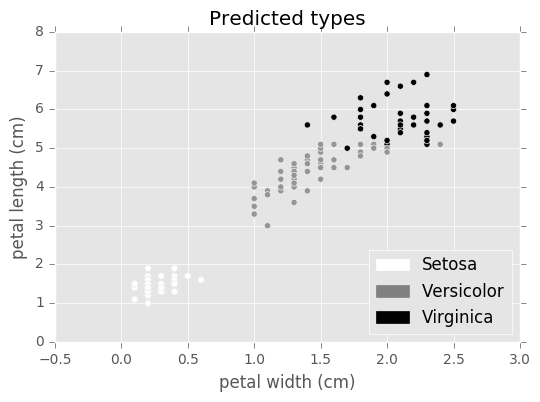

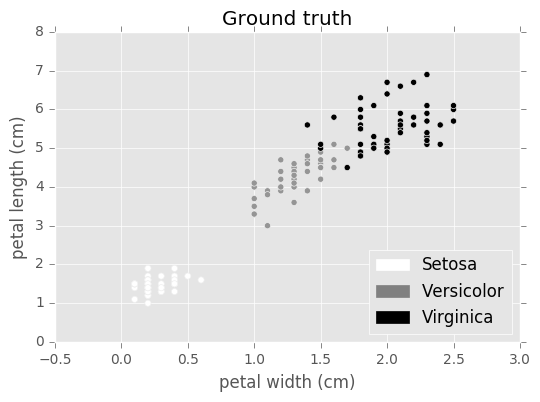

In [17]:
ax = data.plot(kind='scatter', x='petal width (cm)', y='petal length (cm)', c=predicted_labels, colorbar=False, title="Predicted types")
ax.legend(handles=[white_patch, grey_patch, black_patch], loc=4)
ax = data.plot(kind='scatter', x='petal width (cm)', y='petal length (cm)', c=iris.TYPE, colorbar=False, title="Ground truth")
ax.legend(handles=[white_patch, grey_patch, black_patch], loc=4)

We can see that the category are almost identical, KMeans found our three iris types.

## Dimensionality reduction & model selection - Eigenfaces

Dimensionality reduction is used to reduce the number of features while keeping a maximum of the variance.

In [18]:
from sklearn.datasets import fetch_olivetti_faces
faces_data = fetch_olivetti_faces(shuffle=True)
print faces_data.data.shape

(400, 4096)


It can be used to increase the speed of our algorithm. On a 64x64-pixels image there is 4096 features and when doing face recognition not all the pixels are important. We can then use PCA to reduce the number of features and increase the speed of our face recognition algorithm.

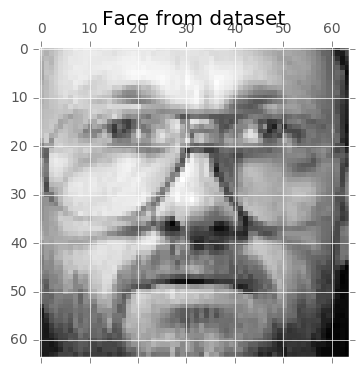

In [19]:
pl.matshow(faces_data.images[0], cmap=pl.cm.gray)
pl.title('Face from dataset')

In [20]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

train_data, test_data, train_labels, test_labels = train_test_split(faces_data.data, faces_data.target, test_size=0.2)

In [21]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

We also use GridSearchCV the try a set of parameters and find the bests for our problem. 

In [22]:
%time _ = clf.fit(train_data, train_labels)

CPU times: user 54.3 s, sys: 232 ms, total: 54.6 s
Wall time: 54.6 s


We can see that fiting our data takes about 50s with the 4096 features, and we have only 320 images !

In [23]:
score = clf.score(test_data, test_labels)
print "Accuracy of our model : {0:.2f}%".format(score * 100)

Accuracy of our model : 98.75%


Without Dimensionality Reduction we reached 95% accuracy in 53s of training time. We can plot the training time and the accuracy of our model with less features.

In [24]:
import copy
import time
def pca_grid_svc(train_data, test_data, n_components):
    train_data = copy.copy(train_data)
    test_data = copy.copy(test_data)
    
    # Use PCA to reduce the number of features
    pca = PCA(n_components=n_components)
    train_data = pca.fit_transform(train_data)
    test_data = pca.transform(test_data)
    
    # Use GridSearchCV to test every parameters combination
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    
    # Time the model fitting
    time_before_fit = time.time()
    clf.fit(train_data, train_labels)
    fit_time = time.time() - time_before_fit
    
    # Compute the model score
    score = clf.score(test_data, test_labels)
    
    return score, fit_time

In [25]:
pca_data = {x: pca_grid_svc(train_data, test_data, x) for x in range(2, 100, 2)}
pca_score = {x: pca[0] for x, pca in pca_data.iteritems()}
pca_time = {x: pca[1] for x, pca in pca_data.iteritems()}

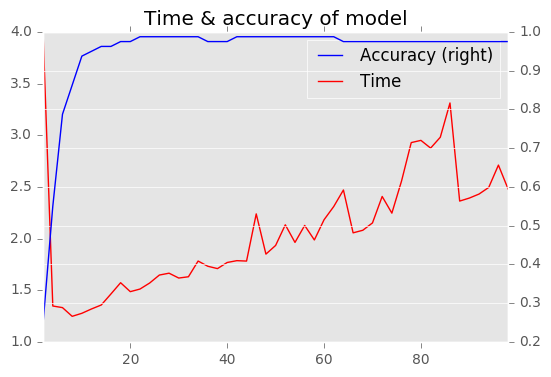

In [30]:
df_score = pd.DataFrame.from_dict(pca_score, orient='index')
df_time = pd.DataFrame.from_dict(pca_time, orient='index')
df_score.columns = ['Accuracy']
df_time.columns = ['Time']
ax = df_score.sort_index().plot(color='blue', secondary_y=True)
ax = df_time.sort_index().plot(ax=ax, color='red', title='Time & accuracy of model')

With this graph we can see that the fiting time is increasing with the number of features but the accuracy is already at its maximum at about 20 features. This means that 20 features might be the best speed/accuracy ratio.

## Things I didn't talk about

* [Outliers](http://datascienceassn.org/sites/default/files/Outlier%20Detection%20-%20Applications%20And%20Techniques.pdf) or noise
* [Overfitting](https://en.wikipedia.org/wiki/Overfitting) or why using separate training and test data
* [Neural Networks](https://www.youtube.com/watch?v=bxe2T-V8XRs), how they work and how to implement one
* [Tensorflow](https://www.tensorflow.org/versions/r0.11/get_started/index.html), library to deploy ML computation on the CPU/GPU

## Resources

* Introduction to Machine Learning : https://www.udacity.com/course/intro-to-machine-learning--ud120
* scikit-learn documentation : http://scikit-learn.org/stable/index.html
* Tensorflow Neural Network playground : http://playground.tensorflow.org/